In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

C:\Users\bhuvi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C:/Users/bhuvi/Downloads/Stock Market Data/Stock Market Data/USDINR 2008_2023.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close
0,01-01-2008,39.419998,39.430000,39.380001,39.244999,39.244999
1,02-01-2008,39.400002,39.437500,39.325001,39.375000,39.375000
2,03-01-2008,39.325001,39.465000,39.195000,39.353001,39.353001
3,04-01-2008,39.195000,39.349998,39.084000,39.095001,39.095001
4,07-01-2008,39.340000,39.340000,39.084999,39.213001,39.213001


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3971 non-null   object 
 1   Open       3947 non-null   float64
 2   High       3947 non-null   float64
 3   Low        3947 non-null   float64
 4   Close      3947 non-null   float64
 5   Adj Close  3947 non-null   float64
dtypes: float64(5), object(1)
memory usage: 186.3+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3947 entries, 0 to 3970
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3947 non-null   object 
 1   Open       3947 non-null   float64
 2   High       3947 non-null   float64
 3   Low        3947 non-null   float64
 4   Close      3947 non-null   float64
 5   Adj Close  3947 non-null   float64
dtypes: float64(5), object(1)
memory usage: 215.9+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3947, 1)

In [7]:
X_train = []
y_train = []

for i in range(60, len(trainData)):  # Adjusted loop bounds to match the length of trainData
    X_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(3887, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [23]:
hist = model.fit(X_train, y_train, epochs = 25, batch_size = 32, verbose=2)

Epoch 1/25
122/122 - 14s - loss: 0.0016 - 14s/epoch - 116ms/step
Epoch 2/25
122/122 - 14s - loss: 0.0018 - 14s/epoch - 113ms/step
Epoch 3/25
122/122 - 14s - loss: 0.0016 - 14s/epoch - 111ms/step
Epoch 4/25
122/122 - 14s - loss: 0.0018 - 14s/epoch - 111ms/step
Epoch 5/25
122/122 - 13s - loss: 0.0015 - 13s/epoch - 110ms/step
Epoch 6/25
122/122 - 13s - loss: 0.0014 - 13s/epoch - 109ms/step
Epoch 7/25
122/122 - 14s - loss: 0.0013 - 14s/epoch - 111ms/step
Epoch 8/25
122/122 - 13s - loss: 0.0013 - 13s/epoch - 110ms/step
Epoch 9/25
122/122 - 13s - loss: 0.0014 - 13s/epoch - 105ms/step
Epoch 10/25
122/122 - 13s - loss: 0.0012 - 13s/epoch - 109ms/step
Epoch 11/25
122/122 - 13s - loss: 0.0012 - 13s/epoch - 109ms/step
Epoch 12/25
122/122 - 14s - loss: 0.0011 - 14s/epoch - 111ms/step
Epoch 13/25
122/122 - 14s - loss: 0.0012 - 14s/epoch - 111ms/step
Epoch 14/25
122/122 - 13s - loss: 0.0010 - 13s/epoch - 110ms/step
Epoch 15/25
122/122 - 13s - loss: 0.0010 - 13s/epoch - 109ms/step
Epoch 16/25
122/122

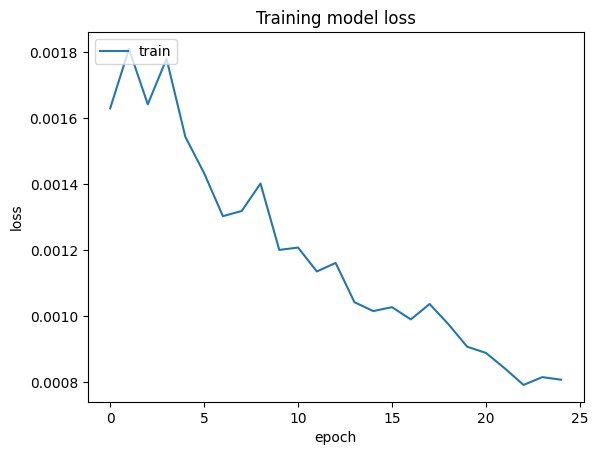

In [24]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [25]:
testData = pd.read_csv("C:/Users/bhuvi/Downloads/Stock Market Data/Stock Market Data/test_usdinr.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(141, 60, 1)

In [26]:
print("Shape of X_test before reshaping:", X_test.shape)


Shape of X_test before reshaping: (141, 60, 1)


In [27]:
y_pred = model.predict(X_test)
y_pred

5/5 [==============================] - 0s 28ms/step


array([[0.97858846],
       [0.9776688 ],
       [0.97632253],
       [0.9747667 ],
       [0.9732471 ],
       [0.97191817],
       [0.9708506 ],
       [0.9701073 ],
       [0.96970975],
       [0.96961486],
       [0.9697617 ],
       [0.970102  ],
       [0.970581  ],
       [0.97102726],
       [0.97135454],
       [0.97179866],
       [0.97276133],
       [0.97426724],
       [0.9760641 ],
       [0.97776556],
       [0.97881687],
       [0.9789747 ],
       [0.9783227 ],
       [0.97710544],
       [0.97562677],
       [0.9741475 ],
       [0.9728673 ],
       [0.9718345 ],
       [0.9709258 ],
       [0.97015005],
       [0.9695564 ],
       [0.9694475 ],
       [0.9698737 ],
       [0.97071105],
       [0.9718151 ],
       [0.97331333],
       [0.9752375 ],
       [0.9773957 ],
       [0.9795671 ],
       [0.9816112 ],
       [0.9834265 ],
       [0.98489255],
       [0.9860118 ],
       [0.9870513 ],
       [0.98814946],
       [0.9893459 ],
       [0.99049115],
       [0.991

In [28]:
predicted_price = sc.inverse_transform(y_pred)

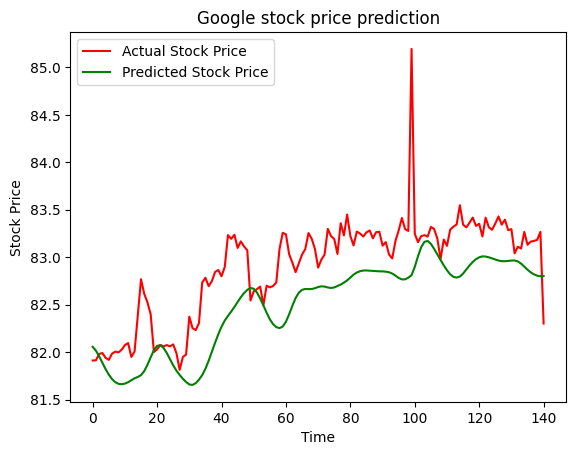

In [29]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 30ms/step
Predicted Future Stock Prices:
2023-03-25 :  51.917446
2023-03-26 :  52.20627
2023-03-27 :  52.89749
2023-03-28 :  52.86624
2023-03-29 :  51.77
2023-03-30 :  52.47427
2023-03-31 :  52.655033
2023-04-01 :  52.879284
2023-04-02 :  52.650707
2023-04-03 :  52.898438
2023-04-04 :  52.700638
2023-04-05 :  51.968025
2023-04-06 :  51.7839
2023-04-07 :  52.394657
2023-04-08 :  52.537556
2023-04-09 :  51.84667
2023-04-10 :  52.45382
2023-04-11 :  52.323227
2023-04-12 :  52.500004
2023-04-13 :  52.60062
2023-04-14 :  52.704773
2023-04-15 :  53.024593
2023-04-16 :  52.37765
2023-04-17 :  52.531975
2023-04-18 :  52.145863
2023-04-19 :  52.489845
2023-04-20 :  52.47431
2023-04-21 :  51.776257
2023-04-22 :  52.086456
2023-04-23 :  52.98882


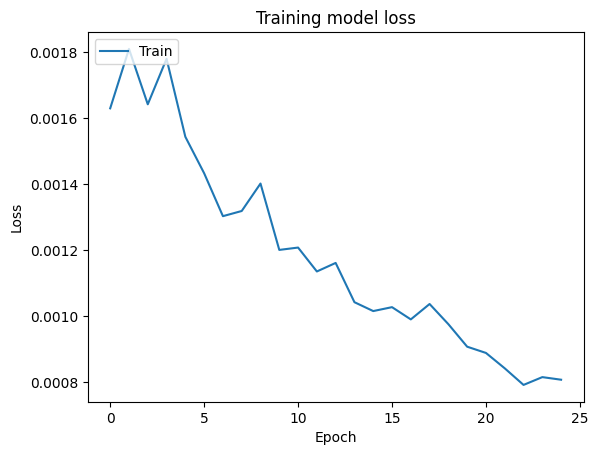

In [41]:
import datetime

# Generate future dates for prediction (next 30 days)
last_date = datetime.datetime.strptime("2023-03-24", "%Y-%m-%d")
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 31)]

# Generate features for future dates (closing prices)
future_features = []

# Assuming you have a method to generate features for future dates
# For simplicity, let's assume future features are random values between 0 and 1
# Replace this with your actual feature generation logic
for _ in range(len(future_dates)):
    future_features.append(np.random.rand())

# Convert future_features to a numpy array
future_data = np.array(future_features)

# Reshape future data to match input shape expected by the model
future_data = np.reshape(future_data, (future_data.shape[0], 1, 1))

# Predict future stock prices
future_predictions = model.predict(future_data)

# Inverse transform predicted prices to get actual prices
predicted_price = sc.inverse_transform(future_predictions)

# Print the predicted future stock prices
print("Predicted Future Stock Prices:")
for i in range(len(predicted_price)):
    print(future_dates[i].strftime("%Y-%m-%d"), ": ", predicted_price[i][0])

# Plot the training model loss
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


In [42]:
y_test = [
    82.265297, 82.338799, 82.214897, 82.164299, 82.255402, 82.100502, 
    82.184799, 82.1409,   82.114799, 81.949997, 81.831299, 81.884804, 
    81.983902, 82.070099, 81.960602, 81.680702, 81.844803, 82.0037, 
    82.107903, 82.340103, 82.1409,   82.054802, 81.852303, 81.9916, 
    81.766899, 81.765099, 81.744797, 81.774696, 81.778702, 81.779999, 
]

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test contains the actual stock prices for the test data
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_price)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_price)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 29.572085532674144
Mean Squared Error (MSE): 874.6575359710121
Root Mean Squared Error (RMSE): 29.574609650357385
